# Tyche Example for Simple Electrolysis

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/framework/src/tyche/>.
import tyche             as ty

from copy import deepcopy

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs(path = ".",
                     name = 'simple-electrolysis.xlsx')

In [5]:
investments = ty.Investments(path = ".",
                             name = 'simple-electrolysis.xlsx')

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Model,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Simple electrolysis,numpy,simple_electrolysis,capital_cost,fixed_cost,production,metrics,NaN


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset               Description  \
Technology          Type    Index                                           
Simple electrolysis Capital Catalyst          0                  Catalyst   
                    Input   Electricity       1               Electricity   
                            Water             0                     Water   
                    Metric  Cost              0                      Cost   
                            GHG               2  Greenhouse gas emissions   
                            Jobs              1                      Jobs   
                    Output  Hydrogen          1                  Hydrogen   
                            Oxygen            0                    Oxygen   

                                        Notes  
Technology          Type    Index              
Simple electrolysis Capital Catalyst      NaN  
                    Input   Electricity   NaN  
                            Water         NaN  
                    Metric  Cost          NaN  
                            GHG           NaN  
                            Jobs          NaN  
                    Output  Hydrogen      NaN  
                            Oxygen        NaN

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology          Scenario                          Variable          Index                                                       
Simple electrolysis Base Electrolysis                 Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity                                          0.85   
                                                                        Water                                                0.95   
                                                      Input price       Electricity                                      3.33e-05   
                                                                        Water                                              0.0048   
                                                      Lifetime          Catalyst                                                3   
                                                      Output efficiency Hydrogen                                              0.9   
                                                                        Oxygen                                                0.9   
                                                      Output price      Hydrogen                                             0.01   
                                                                        Oxygen                                              0.003   
                                                      Scale             Catalyst                                             6650   
                    Fast Progress on Electrolysis     Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity  st.truncnorm(-3, 0.75, loc=0.97, scale=0.04)   
                                                                        Water           st.truncnorm(-3, 2, loc=0.97, scale=0.01)   
                                                      Input price       Electricity                                      3.33e-05   
                                                                        Water                                              0.0048   
                                                      Lifetime          Catalyst                                                3   
                                                      Output efficiency Hydrogen              st.beta(3, 2, loc=0.90, scale=0.03)   
                                                                        Oxygen                st.beta(3, 2, loc=0.90, scale=0.06)   
                                                      Output price      Hydrogen                                             0.01   
                                                                        Oxygen                                              0.003   
                                                      Scale             Catalyst                                             6650   
                    Moderate Progress on Electrolysis Input             Electricity                                           279   
                                                                        Water                                               19.04   
                                                      Input efficiency  Electricity  st.truncnorm(-2, 1.75, loc=0.93, scale=0.04)   
                                                                        Water           st.truncnorm(-2, 3, loc=0.97, scale=0.01)   
                                                      Input price       Electricity                                      3.33e-05   
 

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset  \
Technology          Scenario                          Parameter                                     
Simple electrolysis Base Electrolysis                 Electricity consumption                   3   
                                                      GHG factor for electricity                9   
                                                      GHG factor for water                      8   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Fast Progress on Electrolysis     Electricity consumption                   3   
                                                      GHG factor for electricity                9   
                                                      GHG factor for water                      8   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Moderate Progress on Electrolysis Electricity consumption                   3   
                                                      GHG factor for electricity                9   
                                                      GHG factor for water                      8   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Slow Progress on Electrolysis     Electricity consumption                   3   
                                                      GHG factor for electricity                9   
                                                      GHG factor for water                      8   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                   

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units Notes
Technology          Variable Index                    
Simple electrolysis Cost     Cost       USD/mole   NaN
                    Metric   Cost        USD/gH2   NaN
                             GHG       gCO2e/gH2   NaN
                             Jobs        job/gH2   NaN
                    Output   Hydrogen     g/mole   NaN
                             Oxygen       g/mole   NaN

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Cateogry`.

In [12]:
investments.tranches

Amount  \
Category         Tranche                 Scenario                                     
Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis      5000000   
                 Low Electrolysis R&D    Slow Progress on Electrolysis      1000000   
                 Medium Electrolysis R&D Moderate Progress on Electrolysis  2500000   
                 No Electrolysis R&D     Base Electrolysis                        0   

                                                                           Notes  
Category         Tranche                 Scenario                                 
Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis       NaN  
                 Low Electrolysis R&D    Slow Progress on Electrolysis       NaN  
                 Medium Electrolysis R&D Moderate Progress on Electrolysis   NaN  
                 No Electrolysis R&D     Base Electrolysis                   NaN

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

,,,Notes
Investment,Category,Tranche,
High R&D Spending,Electrolysis R&D,High Electrolysis R&D,NaN
Low R&D Spending,Electrolysis R&D,Low Electrolysis R&D,NaN
Medium R&D Spending,Electrolysis R&D,Medium Electrolysis R&D,NaN
No R&D Spending,Electrolysis R&D,No Electrolysis R&D,NaN


## Evaluate the scenarios in the dataset.

In [14]:
scenario_results = designs.evaluate_scenarios(sample_count=1)

Evaluating Simple electrolysis


In [15]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology          Scenario                          Sample Variable Index                 
Simple electrolysis Base Electrolysis                 1      Cost     Cost       0.183900   
                                                             Metric   Cost       0.102121   
                                                                      GHG       21.391959   
                                                                      Jobs       0.000083   
                                                             Output   Hydrogen   1.800796   
                                                                      Oxygen    14.406372   
                    Fast Progress on Electrolysis     1      Cost     Cost       0.183273   
                                                             Metric   Cost       0.095762   
                                                                      GHG       20.128328   
                                                                      Jobs       0.000078   
                                                             Output   Hydrogen   1.913848   
                                                                      Oxygen    15.395320   
                    Moderate Progress on Electrolysis 1      Cost     Cost       0.182391   
                                                             Metric   Cost       0.098173   
                                                                      GHG       20.735117   
                                                                      Jobs       0.000081   
                                                             Output   Hydrogen   1.857842   
                                                                      Oxygen    15.542188   
                    Slow Progress on Electrolysis     1      Cost     Cost       0.184328   
                                                             Metric   Cost       0.098820   
                                                                      GHG       20.652241   
                                                                      Jobs       0.000080   
                                                             Output   Hydrogen   1.865297   
                                                                      Oxygen    14.809572   

                                                                                    Units  
Technology          Scenario                          Sample Variable Index                
Simple electrolysis Base Electrolysis                 1      Cost     Cost       USD/mole  
                                                             Metric   Cost        USD/gH2  
                                                                      GHG       gCO2e/gH2  
                                                                      Jobs        job/gH2  
                                                             Output   Hydrogen     g/mole  
                                                                      Oxygen       g/mole  
                    Fast Progress on Electrolysis     1      Cost     Cost       USD/mole  
                                                             Metric   Cost        USD/gH2  
                                                                      GHG       gCO2e/gH2  
                                                                      Jobs        job/gH2  
                                                             Output   Hydrogen     g/mole  
                                                                      Oxygen       g/mole  
                    Moderate Progress on Electrolysis 1      Cost     Cost       USD/mole  
                                                             Metric   Cost        USD/gH2  
                                                                      GHG       gCO2e/gH2  
                                                                      Jobs        job/gH2  
         

### Save results.

In [16]:
#scenario_results.to_csv("example-scenario.csv")

### Plot GHG metric.

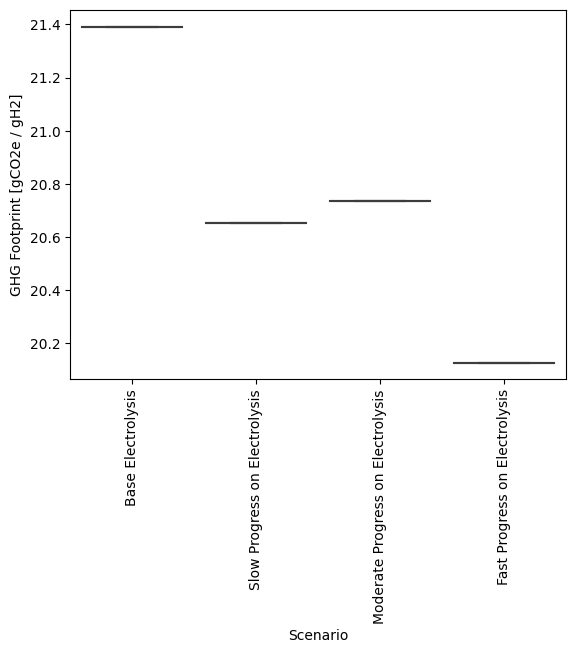

In [17]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "GHG"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="GHG Footprint [gCO2e / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot cost metric.

In [ ]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "Cost"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="Cost [USD / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot employment metric.

In [ ]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ("Metric", "Jobs"),
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="Employment [job / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Evaluate the investments in the dataset.

In [ ]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

### Costs of investments.

In [ ]:
investment_results.amounts

### Benefits of investments.

In [ ]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

In [ ]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

### Save results.

In [ ]:
#investment_results.amounts.to_csv("example-investment-amounts.csv")

In [ ]:
#investment_results.metrics.to_csv("example-investment-metrics.csv")

### Plot GHG metric.

In [ ]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="GHG Footprint [gCO2e / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot cost metric.

In [ ]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Cost",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="Cost [USD / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### Plot employment metric.

In [ ]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Jobs",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="Employment [job / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Sensitity analysis.

### Vary the four efficiencies in the design.

In [ ]:
# Four variables are involved.
variables = [
    ("Input efficiency" , "Water"      ),
    ("Input efficiency" , "Electricity"),
    ("Output efficiency", "Oxygen"     ),
    ("Output efficiency", "Hydrogen"   ),
]

In [ ]:
# Let efficiencies range from 0.75 to 0.975.
efficiencies = np.arange(0.750, 1.000, 0.025)
efficiencies

### Start from the base case.

In [ ]:
base_design = designs.designs.xs("Base Electrolysis", level=1, drop_level=False)
base_design

In [ ]:
base_parameters = designs.parameters.xs("Base Electrolysis", level=1, drop_level=False)
base_parameters

### Generate the new scenarios and append them to the previous ones.

In [ ]:
sensitivities = deepcopy(designs)
sensitivities.designs = sensitivities.designs[0:0]
sensitivities.parameters = sensitivities.parameters[0:0]

In [ ]:
# Iterate over variables and efficiencies.
for variable, index in variables:
    for efficiency in efficiencies:

        # Name the scenario.
        scenario = "Let " + variable + " @ " + index + " = " + str(round(efficiency, 3))
        
        # Alter the base case.
        vary_design = base_design.rename(index={"Base Electrolysis" : scenario}, level=1)
        vary_design.loc[("Simple electrolysis", scenario, variable, index), "Value"] = efficiency
        
        # Keep the parameters the same.
        vary_parameters = base_parameters.rename(index={"Base Electrolysis" : scenario}, level=1)
        
        # Append the results to the existing table of scenarios.
        sensitivities.designs = pd.concat([sensitivities.designs, vary_design])
        sensitivities.parameters = pd.concat([sensitivities.parameters, vary_parameters])

#### Remember to compile the design, since we've added scenarios.

In [ ]:
sensitivities.compile()

#### See how many rows there are in the tables now.

In [ ]:
sensitivities.designs.shape

In [ ]:
sensitivities.parameters.shape

In [ ]:
sensitivities.designs

### Compute the results.

In [ ]:
results = sensitivities.evaluate_scenarios(1)
results

### Plot the cost results.

In [ ]:
cost_results = results.xs("Cost", level="Variable").reset_index()[["Scenario", "Value"]]

In [ ]:
cost_results[0:10]

In [ ]:
cost_results["Variable"  ] = cost_results["Scenario"].apply(lambda x: re.sub(r'^Let (.*) @ (.*) =.*$', '\\1[\\2]', x))
cost_results["Efficiency"] = cost_results["Scenario"].apply(lambda x: float(re.sub(r'^.*= (.*)$', '\\1', x)))
cost_results["Cost [USD/mole]"] = cost_results["Value"]

In [ ]:
cost_results = cost_results[["Variable", "Efficiency", "Cost [USD/mole]"]]
cost_results[0:10]

In [ ]:
# Here is a really simple plot.
cost_results.plot(
    x="Efficiency",
    y="Cost [USD/mole]",
    c=cost_results["Variable"].apply(lambda v: {
        "Input efficiency[Water]"       : "blue"  ,
        "Input efficiency[Electricity]" : "orange",
        "Output efficiency[Oxygen]"     : "green" ,
        "Output efficiency[Hydrogen]"   : "red"   ,
    }[v]),
    kind="scatter"
)